# Linear Regression

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [15]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Preprocessing

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


There are no null values present in the data

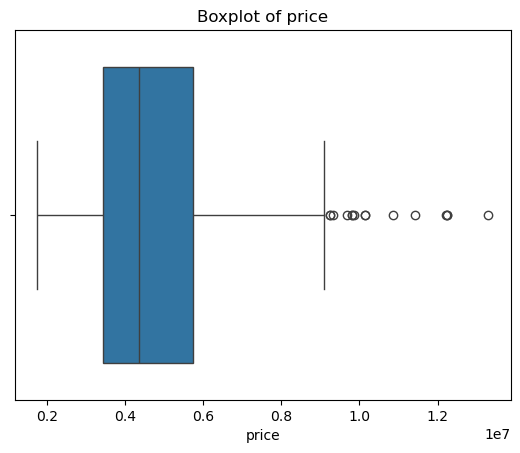

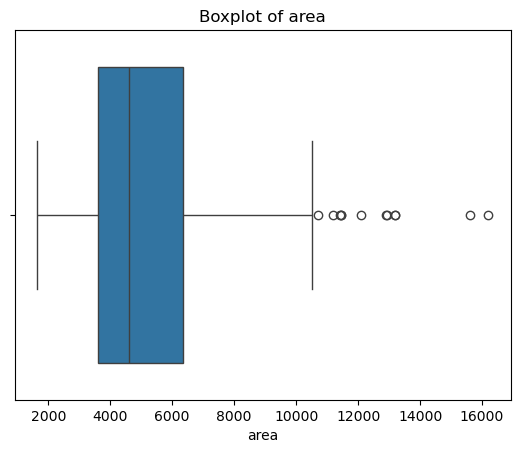

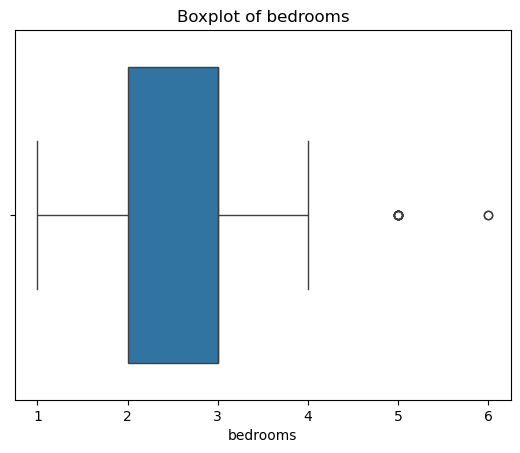

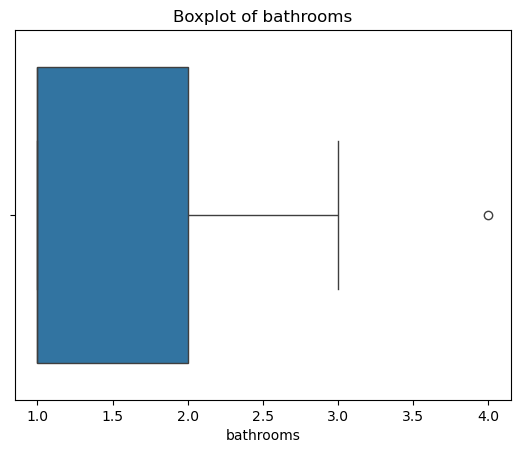

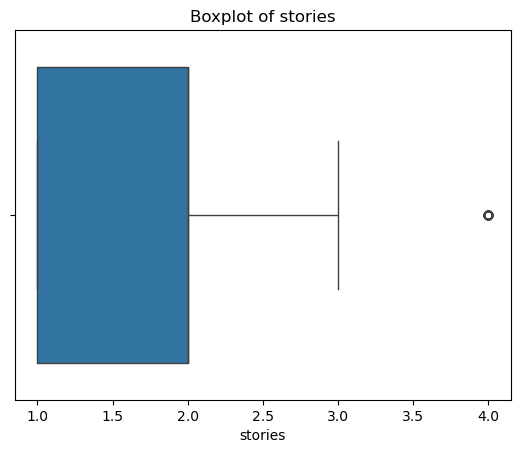

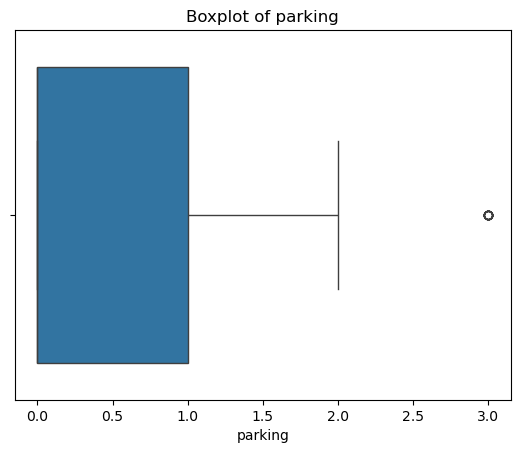

In [17]:
for col in df.select_dtypes(include=['int','float']).columns:
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

There are some outliers in Price and area

In [18]:
# Removing outliers using IQR method

Q3_Price = df['price'].quantile(0.75)
Q1_Price = df['price'].quantile(0.25)
IQR_Price = Q3_Price - Q1_Price
lower_bound_Price = Q1_Price - 1.5 * IQR_Price
upper_bound_Price = Q3_Price + 1.5 * IQR_Price

Q3_Area = df['area'].quantile(0.75)
Q1_Area = df['area'].quantile(0.25)
IQR_Area = Q3_Area - Q1_Area
lower_bound_Area = Q1_Area - 1.5 * IQR_Area
upper_bound_Area = Q3_Area + 1.5 * IQR_Area

df = df[(df['price'] >= lower_bound_Price) & (df['price'] <= upper_bound_Price)]
df = df[(df['area'] >= lower_bound_Area) & (df['area'] <= upper_bound_Area)]

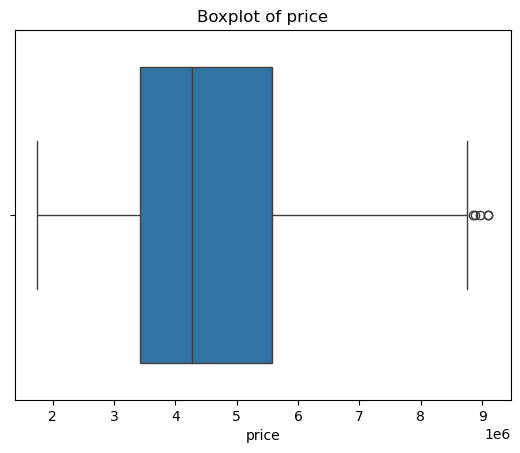

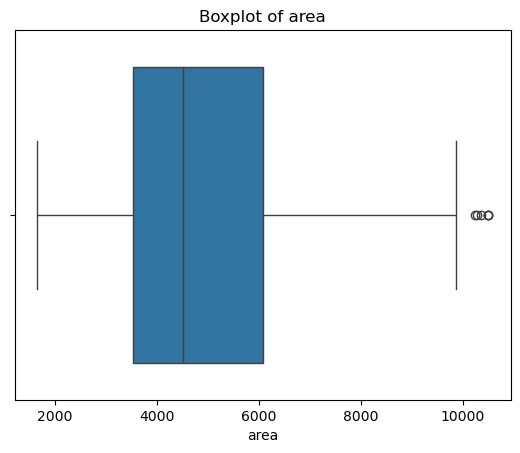

In [19]:
# Boxplot after removing outliers
for col in ['price', 'area']:
    sns.boxplot(x=col, data=df)
    plt.title(f'Boxplot of {col}')
    plt.show()

Significant number of outliers are removed from Price and Area columns

In [24]:
# Encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_features = encoder.fit_transform(df.select_dtypes(exclude=['int', 'float']))
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(df.select_dtypes(exclude=['int', 'float']).columns))
df_encoded = pd.concat([df.select_dtypes(include=['int', 'float']).reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
df_encoded.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,9100000,6000,4,1,2,2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,9100000,6600,4,2,2,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,8960000,8500,3,2,4,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,8890000,4600,3,2,2,2,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,8855000,6420,3,2,2,1,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


In [25]:
# Scaling the data

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_encoded), columns=df_encoded.columns)
X = df_scaled.drop('price', axis=1)
y = df_scaled['price']
df_scaled.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,1.000000,0.491525,0.6,0.0,0.333333,0.666667,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1.000000,0.559322,0.6,0.5,0.333333,0.333333,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0
2,0.980952,0.774011,0.4,0.5,1.000000,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.971429,0.333333,0.4,0.5,0.333333,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.966667,0.538983,0.4,0.5,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0


## Train Test Splitting

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Fitting a Linear Model (Multiple Linear Regression)

We find how these features are affecting house price values

In [27]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.28590974  0.04396587  0.19561532  0.1729548   0.07144489  0.05708374
  0.04776346  0.03119626  0.11175106  0.11625469  0.07055623  0.00496704
 -0.04386338]
Intercept: 0.06180240599832837


The intercept is 0.0618 which means that when all the features are zero the price prediction will be 0.0618 approximately zero.

## Model Evaluation

In [28]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.019299204465172873
Root Mean Squared Error: 0.13892157667249846
R-squared: 0.6653980702346334
Mean Absolute Error: 0.10532002003339845


Even though the MSE, RMSE and MAE are smaller values, the variance of price data is not much explained by the multiple linear regression model (only 66.5%). So, we can find the features with more predictive capacity and fit a model using only those features.

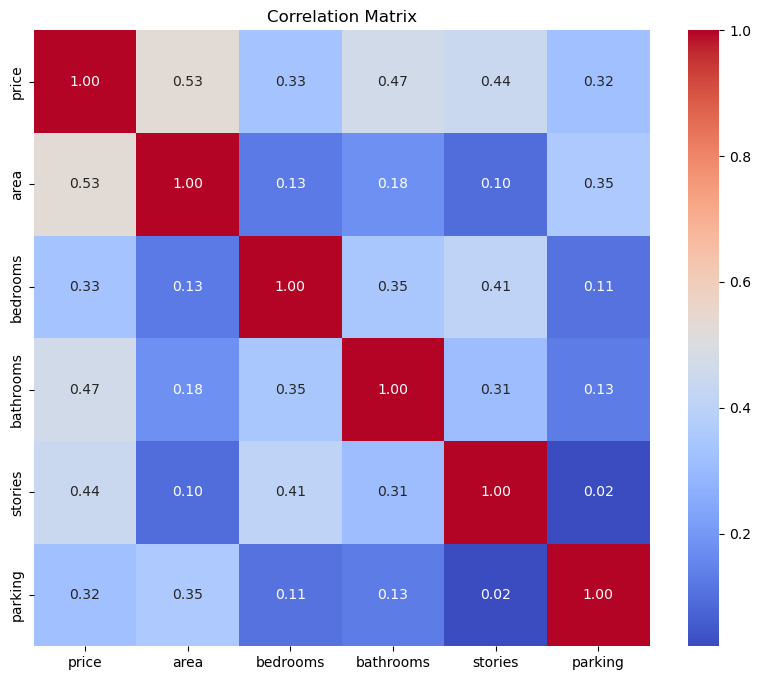

In [30]:
corr = df.select_dtypes(include=['int','float']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


From the heatmap, we can see that the predictive capacity of all the features is weak to predict the housing price. In the available features, area has the most predicitve capability. So, we tried to fit a linear model using only one feature; area

Coefficients: [0.55262573]
Intercept: [0.17722253]
Mean Squared Error: 0.042198352571152294
Root Mean Squared Error: 0.20542237602352936
Mean Absolute Error: 0.16436382650334075
R-squared: 0.2683817496878155


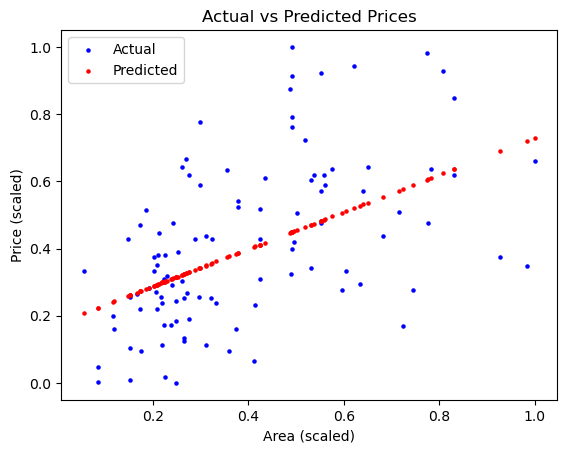

In [35]:
# defining response and predictive feature

X = df['area'].values.reshape(-1, 1)
y = df['price'].values

# scaling the data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# fitting the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# making predictions
y_pred = model.predict(X_test)
print("Coefficients:", model.coef_[0])
print("Intercept:", model.intercept_)

# evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

# visualizing the results
plt.scatter(X_test, y_test,5, color='blue', label='Actual')
plt.scatter(X_test, y_pred,5, color='red', label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Area (scaled)')
plt.ylabel('Price (scaled)')
plt.legend()
plt.show()

There is a positive linear trend that can be seen from the visual, but the R-squared variable is again very much smaller than expected, so we can say that, even though area has a greater effect on housing price than other features, it is not enough to explain the whole variability in the housing price 

In [37]:
explained_variance = r2 * 100
print(f"Explained Variance: {explained_variance:.2f}%")

Explained Variance: 26.84%
